# ДЗ №4 Береснева Юлия

- Data set is "Meta-data Data Set" https://archive.ics.uci.edu/ml/datasets/Meta-data
- Relevant Information: 
> This DataSet is about the results of Statlog project. The project performed a comparative study between Statistical, Neural and Symbolic learning algorithms. 
- Number of Instances: 528
- Number of Attributes: 22
- Attribute Information:
 - `DS_Name` - Name of DataSet - название набора данных
 - `T` - Number of examples in test set - количество примеров в тестовом наборе
 - `N` - Number of examples - количесвто примеров
 - `p` - Number of attributes - количесвто атрибутов
 - `k` - Number of classes - количество классов
 - `Bin` - Number of binary Attributes - количество бинарных атрибутов
 - `Cost` - Cost ( `1 = yes`,`0 = no`) - стоимость
 - `SDratio` - Standard deviation ratio - коэффициент стандартного отклонения
 - `correl`- Mean correlation between attributes - средняя корреляция между атрибутами
 - `cancor1` - First canonical correlation - Первая каноническая корреляция
 - `cancor2` - Second canonical correlation - Вторая каноническая корреляция
 - `fract1` - First eigenvalue - первое собственное значение
 - `fract2` - Second eigenvalue - второе собственное значение
 - `skewness` - Mean of $ \frac{|E(x - Mean)|^3}{STD^3} $ - асимметрия -  среднее значение $ \frac{|E(x - Mean)|^3}{STD^3} $
 - `kurtosis` - Mean of $ \frac{|E(x - Mean)|^4}{STD^4} $ - среднее значение $ \frac{|E(x - Mean)|^4}{STD^4} $ 
 - `Hc` - Mean entropy of attributes - средняя энтропия атрибутов
 - `Hx`- Entropy of classes - энтропия классов
 - `MCx` - Mean mutual entropy of class and attributes - средняя взаимная энтропия класса и атрибутов
 - `EnAtr` - Equivalent number of attributes - Эквивалентное количество атрибутов
 - `NSRatio` - Noise-signal ratio - Отношение сигнал / шум
 - `Alg_Name` - Name of Algorithm -  имя алгоритма
 - `Norm_error` - Normalized Error (continuous class) - нормализованная ошибка (непрерывный класс)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/meta-data/meta.data'
#data = pd.read_csv(url, sep = ',', engine='python')
data = pd.read_csv('../source/meta1.data', sep = ',', engine = 'python')

In [3]:
c1 = data[data['Alg_Name'] == 'KNN']
c2 = data[data['Alg_Name'] == 'CART']
c3 = data[data['Alg_Name'] == 'LVQ']
c4 = data[data['Alg_Name'] == 'Cascade']
c5 = data[data['Alg_Name'] == 'Smart']

In [4]:
data = pd.concat((c1, c2, c3, c4, c5), axis = 0)

In [5]:
X = data.drop(['DS_Name', 'correl', 'cancor2', 'fract2', 'Alg_Name'], axis = 1) # выбрасываем столбцы
y = data['Alg_Name']
print(y.unique())

['KNN' 'CART' 'LVQ' 'Cascade' 'Smart']


Обрабатываем `y`

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.unique())

LabelEncoder()

In [7]:
y_tr = le.transform(y)
print(y_tr)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


 Разбиваем данные на обучающую и тестовую выборки

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_tr, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

In [9]:
print(y_train)

[4 1 1 0 1 3 0 2 0 1 0 2 0 3 4 3 4 0 0 2 4 4 0 1 0 0 3 2 1 2 4 4 2 2 0 1 0
 3 3 3 1 0 3 1 3 4 3 2 2 3 1 2 3 2 3 4 0 2 4 0 4 1 4 2 3 4 4 0 1 1 0 1 3]


Обучаем классификатор

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
countNeurons = 125
mlp_model = MLPClassifier(hidden_layer_sizes = (countNeurons, ),activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(125,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверяем качество классификатора

In [12]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [13]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.561643835616 0.891891891892


In [14]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.438356164384 0.108108108108


In [15]:
print(1 - mlp_model.score(X_test, y_test))

0.891891891892


Подбор числа нейронов на первом слое:

In [16]:
neurons_arr = [10,50,70,80,110,125,140,155]
test_err = []
train_err = []
for countNeurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (countNeurons, ), solver = 'lbfgs',  activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

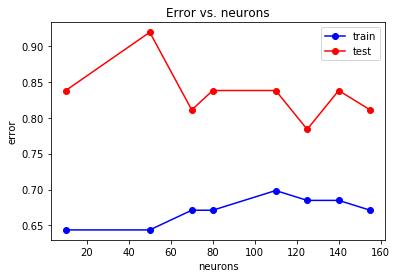

In [17]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'train')
plt.plot(neurons_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

По графику видно, что ошибка на обучающей возрастает с увеличением числа нейронов на скром слое

Ошибка на тестовой выборке велика.

Возможные причины:
 - Неправильно подобран алгоритм
 - Не настроены гиперпараметры

Попробуем подобрать гиперпараметры ниже

In [18]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.643835616438 0.783783783784


Подбор _гипер_параметров
Попытаемся подобрать _оптимальное_ значения параметра регуляризации `alpha`

In [20]:
alpha_arr = np.array([0.048,0.2, 0.4, 0.9, 3, 8,13])

test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (125, ), solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

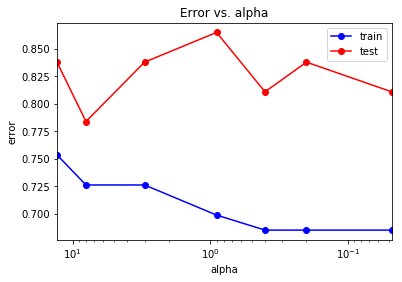

In [21]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Поскольку даже на обучающей выборке мы не можем достичь малой ошибки модели, наблюдается недообучениие

_Комм. Предполагаю, что это специфика набора данных задачи_ 

Минимальное значение ошибки:

In [22]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.684931506849 0.783783783784


Оптимальное значение `alpha`

In [23]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
print(alpha_opt[0])

[ 8.]
8.0


In [24]:
alpha_opt = alpha_opt[0]
print(alpha_opt)

8.0


Классификатор при найденном _оптимальном_ значении `alpha`
Повторяем обучение:

In [26]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (125,),solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.767123287671 0.864864864865


Посмотрим на матрицу рассогласования

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[5 7 9 7 8]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]


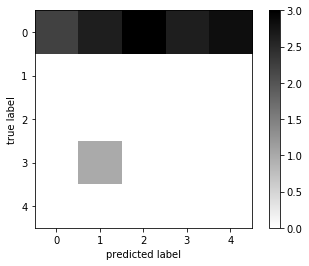

In [28]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Еще одна метрика качества:

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.14      1.00      0.24         5
          1       0.00      0.00      0.00         8
          2       0.00      0.00      0.00         9
          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00         8

avg / total       0.02      0.14      0.03        37



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
